# 1. Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

%load_ext autoreload
%autoreload 2

# 2. Ames Housing Dataset

## 2.1 Load Data

In [2]:
from sklearn.datasets import fetch_openml

data = fetch_openml(data_id=42165, as_frame=True)
df = data.frame

# Feature-Auswahl
selected_features = ['LotArea', 'OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea',
                     'Neighborhood', 'BldgType', 'HouseStyle', 'CentralAir', 'ExterQual']

X = df[selected_features]
y = df['SalePrice']

X.head()

,LotArea,OverallQual,YearBuilt,1stFlrSF,GrLivArea,Neighborhood,BldgType,HouseStyle,CentralAir,ExterQual
0,8450,7,2003,856,1710,CollgCr,1Fam,2Story,Y,Gd
1,9600,6,1976,1262,1262,Veenker,1Fam,1Story,Y,TA
2,11250,7,2001,920,1786,CollgCr,1Fam,2Story,Y,Gd
3,9550,7,1915,961,1717,Crawfor,1Fam,2Story,Y,TA
4,14260,8,2000,1145,2198,NoRidge,1Fam,2Story,Y,Gd


In [3]:
# scale data
scaler = StandardScaler()
X_num = scaler.fit_transform(X.iloc[:,:5])
X = pd.concat([pd.DataFrame(X_num, columns=X.columns[:5]), X.iloc[:,5:]], axis=1)

y = (y - y.mean()) / y.std()

X.head()

,LotArea,OverallQual,YearBuilt,1stFlrSF,GrLivArea,Neighborhood,BldgType,HouseStyle,CentralAir,ExterQual
0,-0.207142,0.651479,1.050994,-0.793434,0.370333,CollgCr,1Fam,2Story,Y,Gd
1,-0.091886,-0.071836,0.156734,0.257140,-0.482512,Veenker,1Fam,1Story,Y,TA
2,0.073480,0.651479,0.984752,-0.627826,0.515013,CollgCr,1Fam,2Story,Y,Gd
3,-0.096897,0.651479,-1.863632,-0.521734,0.383659,Crawfor,1Fam,2Story,Y,TA
4,0.375148,1.374795,0.951632,-0.045611,1.299326,NoRidge,1Fam,2Story,Y,Gd


## 2.1 Load + Model

In [39]:
import importlib
import igann

importlib.reload(igann)

from igann import IGANN

model = IGANN(task='regression', n_hid=10)
model.fit(X, y)

X.shape:  torch.Size([1241, 5])
X_num_feature.shape:  torch.Size([1241])
X_cat_feature.shape:  torch.Size([1241, 5])
X_comb_feature.shape:  torch.Size([1241, 5])
self.hidden_mat.shape:  torch.Size([5, 50])
X.shape:  torch.Size([219, 5])
X_num_feature.shape:  torch.Size([219])
X_cat_feature.shape:  torch.Size([219, 5])
X_comb_feature.shape:  torch.Size([219, 5])
self.hidden_mat.shape:  torch.Size([5, 50])
X.shape:  torch.Size([1241, 5])
X_num_feature.shape:  torch.Size([1241])
X_cat_feature.shape:  torch.Size([1241, 5])
X_comb_feature.shape:  torch.Size([1241, 5])
self.hidden_mat.shape:  torch.Size([5, 50])
X.shape:  torch.Size([219, 5])
X_num_feature.shape:  torch.Size([219])
X_cat_feature.shape:  torch.Size([219, 5])
X_comb_feature.shape:  torch.Size([219, 5])
self.hidden_mat.shape:  torch.Size([5, 50])
X.shape:  torch.Size([1241, 5])
X_num_feature.shape:  torch.Size([1241])
X_cat_feature.shape:  torch.Size([1241, 5])
X_comb_feature.shape:  torch.Size([1241, 5])
self.hidden_mat.shape:

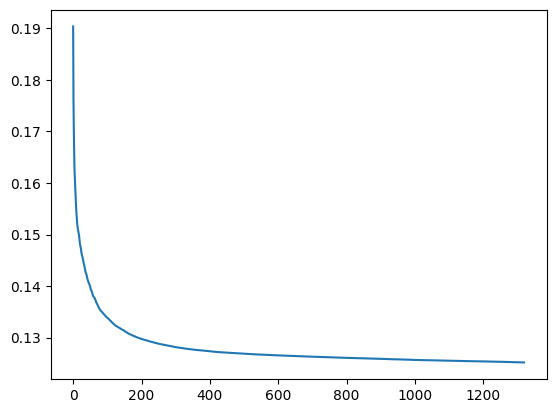

In [42]:
# plot train loss
plt.plot(model.train_losses)

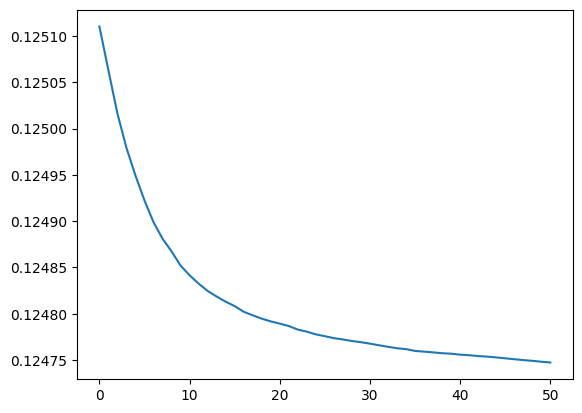

In [43]:
plt.plot(model.train_losses_it)

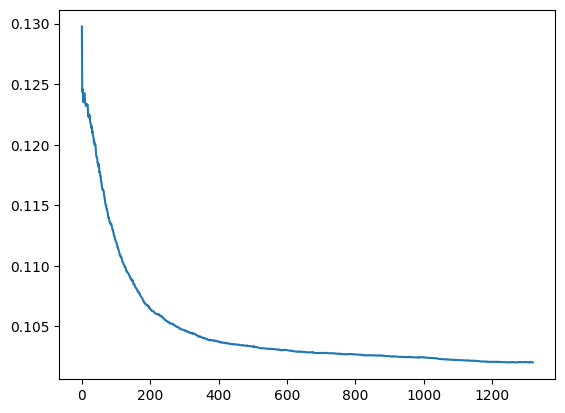

In [45]:
plt.plot(model.val_losses)

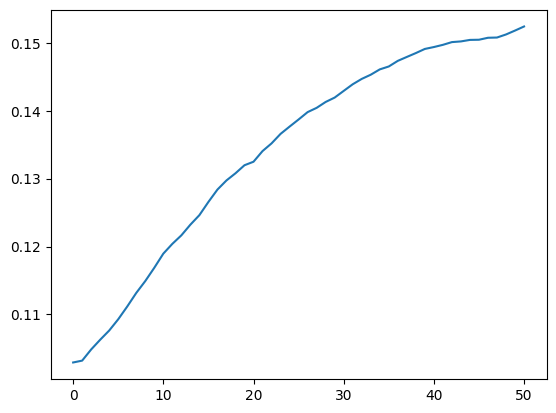

In [44]:
plt.plot(model.val_losses_it)

## 2.2 Infos zu Model

### 2.2.1 Alle Attribute

In [16]:
ignored_attributes = ["regressor_predictions", "unique", "hist"]

for attr, value in vars(model).items():
    if attr not in ignored_attributes:
        print(f"{attr}: {value}")

task: regression
n_hid: 10
elm_scale: 1
elm_alpha: 1
init_reg: 1
act: elu
n_estimators: 5000
early_stopping: 50
sparse: 0
device: cpu
random_state: 1
optimize_threshold: False
verbose: 0
boost_rate: 0.1
target_remapped_flag: False
init_classifier: Lasso(alpha=1)
criterion: MSELoss()
regressors: [<igann.igann.ELM_Regressor object at 0x10d82de50>, <igann.igann.ELM_Regressor object at 0x138066460>, <igann.igann.ELM_Regressor object at 0x1380665e0>, <igann.igann.ELM_Regressor object at 0x1380661f0>, <igann.igann.ELM_Regressor object at 0x138066d00>, <igann.igann.ELM_Regressor object at 0x138066340>, <igann.igann.ELM_Regressor object at 0x138066ac0>, <igann.igann.ELM_Regressor object at 0x1380666d0>, <igann.igann.ELM_Regressor object at 0x1380666a0>, <igann.igann.ELM_Regressor object at 0x138066b50>, <igann.igann.ELM_Regressor object at 0x138066bb0>, <igann.igann.ELM_Regressor object at 0x1380663a0>, <igann.igann.ELM_Regressor object at 0x138066910>, <igann.igann.ELM_Regressor object at 0x1

In [ ]:
model.dummy_encodings

In [ ]:
model.feature_names

# 3. Entwicklung Interaction Pair Selection

In [48]:
X_neu = model._preprocess_feature_matrix(X)
X_neu

tensor([[-0.7934,  0.3703, -0.2071,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2571, -0.4825, -0.0919,  ...,  0.0000,  0.0000,  1.0000],
        [-0.6278,  0.5150,  0.0735,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0657,  1.5696, -0.1478,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2190, -0.8328, -0.0802,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2416, -0.4939, -0.0581,  ...,  0.0000,  0.0000,  0.0000]])

In [49]:
model._constraint_dt(X_neu, y)

In [ ]:
model.best_combination

# number of elements in list
len(model.best_combination)

[2, 5, 6, 7, 8]